# Presentation seminar 2: Foundations of Conformal and Venn Prediction with applications 151124

I am working on a python package for online conformal prediction. The motivation was that we use conformalised ridge regression and test martingales in some of the projects I am working on with industrial partners, and I have not found any packages for online conformal prediction. Since we had the nice one-nearest neighbours example in the introductory lecture, I decided to add this algorithm to the package. Coincedentally, we just managed to ready a release of a minimal version of the package yesterday, which can be found on PiPy https://pypi.org/project/online-cp/

In [1]:
import numpy as np
rnd_gen = np.random.default_rng(2024)
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from online_cp import ConformalNearestNeighboursClassifier
from sklearn.datasets import make_classification

# The example from day 1

$(3,+1),(-2,-1),(-1,-1),(1,+1),(2,+1),\dots$

In [2]:
X = np.array([3, -2, -1, 1, 2]).reshape(-1,1)
Y = np.array([1, -1, -1, 1, 1])

We define a conformal predictor

In [3]:
cp = ConformalNearestNeighboursClassifier(label_space=np.unique(Y), rnd_state=2024)

and process the examples one by one

In [4]:
i = 0

Gamma, p_values = cp.predict(X[i], epsilon=0.1, return_p_values=True, verbose=100)
print(f'Realised p-values: {p_values}')
print(f'Prediction set {Gamma}')

Nonconformity scores for hypothesis y=-1: [inf]
p-value for hypothesis y=-1: (0 + 1*tau)/1
Nonconformity scores for hypothesis y=1: [inf]
p-value for hypothesis y=1: (0 + 1*tau)/1
Realised p-values: {-1: 0.6758313379812818, 1: 0.6758313379812818}
Prediction set [-1  1]


In the example given, we had

$p(+1) = \tau_1$

$p(-1) = \tau_1$

Which agrees with the above. In this implementation, the distance is set to $\infty$ if there is no example with the same/different label. In the example given, it was 100.


Next, we learn the label.

In [5]:
cp.learn_one(X[i], Y[i])

Predict the second object

In [6]:
i = 1

Gamma, p_values = cp.predict(X[i], epsilon=0.1, return_p_values=True, verbose=100)
print(f'Realised p-values: {p_values}')
print(f'Prediction set {Gamma}')

Nonconformity scores for hypothesis y=-1: [1.79769313e+308 1.79769313e+308]
p-value for hypothesis y=-1: (0 + 2*tau)/2
Nonconformity scores for hypothesis y=1: [0. 0.]
p-value for hypothesis y=1: (0 + 2*tau)/2
Realised p-values: {-1: 0.21432320123825765, 1: 0.21432320123825765}
Prediction set [-1  1]


In the example given, we had

$p(+1) = \tau_2$

$p(-1) = \tau_2$

which again agrees with the above.

We learn the true label.

In [7]:
cp.learn_one(X[i], Y[i])

Predict the third object

In [8]:
i = 2

Gamma, p_values = cp.predict(X[i], epsilon=0.1, return_p_values=True, verbose=100)
print(f'Realised p-values: {p_values}')
print(f'Prediction set {Gamma}')

Nonconformity scores for hypothesis y=-1: [1.79769313e+308 2.00000000e-001 2.50000000e-001]
p-value for hypothesis y=-1: (1 + 1*tau)/3
Nonconformity scores for hypothesis y=1: [8.00000000e-001 1.79769313e+308 4.00000000e+000]
p-value for hypothesis y=1: (1 + 1*tau)/3
Realised p-values: {-1: 0.4364840102938972, 1: 0.4364840102938972}
Prediction set [-1  1]


In the example given, we had

$p(+1) = \dfrac{1+\tau_3}{3}$

$p(-1) = \dfrac{1+\tau_3}{3}$

which again agrees with the above.

In [9]:
cp.learn_one(X[i], Y[i])

Predict fourth object

In [10]:
i = 3

Gamma, p_values = cp.predict(X[i], epsilon=0.1, return_p_values=True, verbose=100)
print(f'Realised p-values: {p_values}')
print(f'Prediction set {Gamma}')

Nonconformity scores for hypothesis y=-1: [1.79769313e+308 2.00000000e-001 2.50000000e-001 1.00000000e+000]
p-value for hypothesis y=-1: (1 + 1*tau)/4
Nonconformity scores for hypothesis y=1: [0.5        0.33333333 0.5        1.        ]
p-value for hypothesis y=1: (0 + 1*tau)/4
Realised p-values: {-1: 0.4498665241937083, 1: 0.1998665241937083}
Prediction set [-1  1]


In the example given, we had

$p(+1) = \dfrac{\tau_4}{4}$

$p(-1) = \dfrac{1+\tau_4}{4}$

In [11]:
cp.learn_one(X[i], Y[i])

Predict fifth and final object

In [12]:
i = 4

Gamma, p_values = cp.predict(X[i], epsilon=0.1, return_p_values=True, verbose=100)
print(f'Realised p-values: {p_values}')
print(f'Prediction set {Gamma}')

Nonconformity scores for hypothesis y=-1: [2.         0.33333333 0.5        2.         3.        ]
p-value for hypothesis y=-1: (0 + 1*tau)/5
Nonconformity scores for hypothesis y=1: [0.25       0.33333333 0.5        0.5        0.33333333]
p-value for hypothesis y=1: (2 + 2*tau)/5
Realised p-values: {-1: 0.19916041977309334, 1: 0.7983208395461867}
Prediction set [-1  1]


In the example given, we had

$p(+1) = \dfrac{2+2\tau_5}{5}$

$p(-1) = \dfrac{\tau_5}{5}$

However, if we look carefully at the nonconformity scores, it seems that we have a disagreement between the example and $\alpha_3$ for the hypothesis $y=+1$. It turns out that this is a typo in the slides, because $z_3=(-1, -1)$, and looking at the data sequence with the hypothesised last label set to $+1$ (which happens to be the true value), it is
$$
    (3, +1), (-2, -1), (-1, -1), (1, +1), (2, +1)
$$
The nearest neighbour of $(-1, -1)$ with the same label is $(-2,-1)$, and the distance is 1. The nearest neighbour with another label is $(1,+1)$, and the distance is 2. Thus $\alpha_3=1/2$ (the slide has $\alpha_3=1$).

# Changing the order
The p-value of the true hypothesis changes if the last example is different.

In [13]:
for i in range(5):
    cp = ConformalNearestNeighboursClassifier(rnd_state=2024)
    cp.learn_initial_training_set(X=np.delete(X, i).reshape(-1,1), y=np.delete(Y, i))
    print(f'Last example: ({X[i][0]}, {Y[i]})')
    cp.predict(X[i], verbose=100)
    print()

Last example: (3, 1)
Nonconformity scores for hypothesis y=-1: [0.33333333 0.5        0.5        1.         4.        ]
p-value for hypothesis y=-1: (0 + 1*tau)/5
Nonconformity scores for hypothesis y=1: [0.33333333 0.5        0.5        0.33333333 0.25      ]
p-value for hypothesis y=1: (4 + 1*tau)/5

Last example: (-2, -1)
Nonconformity scores for hypothesis y=-1: [0.25       0.5        0.5        0.33333333 0.33333333]
p-value for hypothesis y=-1: (2 + 2*tau)/5
Nonconformity scores for hypothesis y=1: [2.50000000e-001 1.79769313e+308 5.00000000e-001 3.33333333e-001
 3.00000000e+000]
p-value for hypothesis y=1: (1 + 1*tau)/5

Last example: (-1, -1)
Nonconformity scores for hypothesis y=-1: [0.25       0.33333333 0.5        0.33333333 0.5       ]
p-value for hypothesis y=-1: (0 + 2*tau)/5
Nonconformity scores for hypothesis y=1: [2.00000000e-001 1.79769313e+308 3.33333333e-001 2.50000000e-001
 2.00000000e+000]
p-value for hypothesis y=1: (1 + 1*tau)/5

Last example: (1, 1)
Nonconformi

The output is a mess, so let's make a table
|Last|$\alpha_5$|$p(y_5)$|Distribution|
|-----|----|----|---|
|$(3,+1)$|1/4|$\dfrac{4+1\tau_5}{5}$|Uniform 0.8, 1
|$(-2,-1)$|1/3|$\dfrac{2+2\tau_5}{5}$| Uniform 0.4, 0.8
|$(-1,-1)$|1/2|$\dfrac{2\tau_5}{5}$|Uniform 0, 0.4
|$(1,+1)$|1/2|$\dfrac{2\tau_5}{5}$|Uniform 0, 0.4
|$(2,+1)$|1/3|$\dfrac{2+2\tau_5}{5}$|Uniform 0.4, 0.8

This table is different from the slides, which is probably due to the previously mentioned typo. However, the overall mixture is still uniform on $[0,1]$. We can check this statistically.

# Randomly draw the last example and compute the p-value for the true hypothesis
We could do a proper statistical test, but let's be satisfied for now with a historam. Later in the course, the obvious thing to do is to use a conformal test martingale to test the hypothesis that the p-values are uniformly distributed on $[0,1]$. The package has functinoality for this as well.

In [14]:
N = 5000
rnd_indices = rnd_gen.integers(low=0, high=5, size=N)
rnd_indices

array([1, 3, 0, ..., 2, 4, 1])

In [15]:
realised_p_values = np.empty(N)
for i, j in enumerate(rnd_indices):
    cp = ConformalNearestNeighboursClassifier()
    cp.learn_initial_training_set(X=np.delete(X, j).reshape(-1,1), y=np.delete(Y, j))
    _, p_values = cp.predict(X[j], return_p_values=True)
    realised_p_values[i] = p_values[Y[j]]

Text(0.5, 1.0, 'Looks uniform enough')

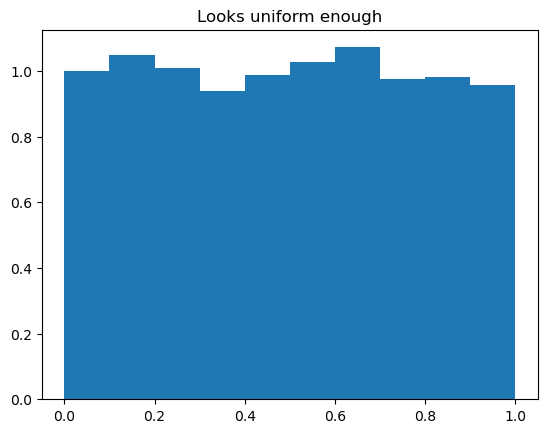

In [16]:
plt.hist(realised_p_values, density=True)
plt.title('Looks uniform enough')

# Backup (if there is time)

Just to illustrate the algorithm in action on a larger dataset, we generate a three class classification problem with two features.

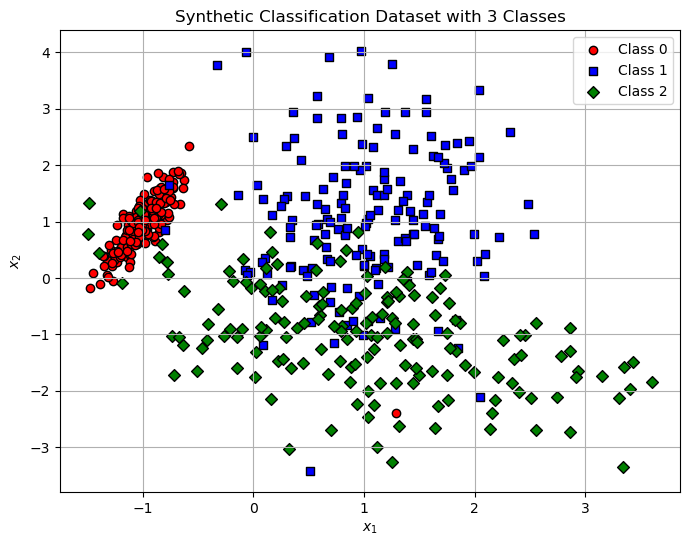

In [17]:
N = 500

X, Y = make_classification(n_samples=N, n_features=2, n_informative=2, n_redundant=0, 
                           n_classes=3, n_clusters_per_class=1, random_state=2024)

# Create a scatter plot with different symbols for each class
plt.figure(figsize=(8, 6))

# Define different markers for each class
markers = ['o', 's', 'D']
colors = ['red', 'blue', 'green']

# Plot each class with a different marker
for label, marker, color in zip(np.unique(Y), markers, colors):
    plt.scatter(X[Y == label, 0], X[Y == label, 1], label=f'Class {label}', marker=marker, color=color, edgecolor='k')

# Add labels and a legend
plt.title('Synthetic Classification Dataset with 3 Classes')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend()
plt.grid(True)
plt.show()

We process the whole dataset and evaluate the performance of our conformal predictor using the efficiency criteria observed excess (OE) and observed fuzziness (OF). These are described in chapter 3 among some others, but these are listed as preferred, as they are conditionally proper (using the conditional probability as conformity measure is optimal).

$OE_n := |\Gamma^{\epsilon}_n\backslash\{y_n\}|$ is the number of labels included apart from the correct one, and 

$OF_n := \sum_{y\in\boldsymbol{Y}\backslash\{y_n\}}p^y_n$ is the sum of the p-values of the false labels.

Running online conformal prediction:   0%|          | 0/500 [00:00<?, ?it/s]

Average error: 0.098
Average observed excess: 0.328
Average observed fuzziness: 0.12585413481382438


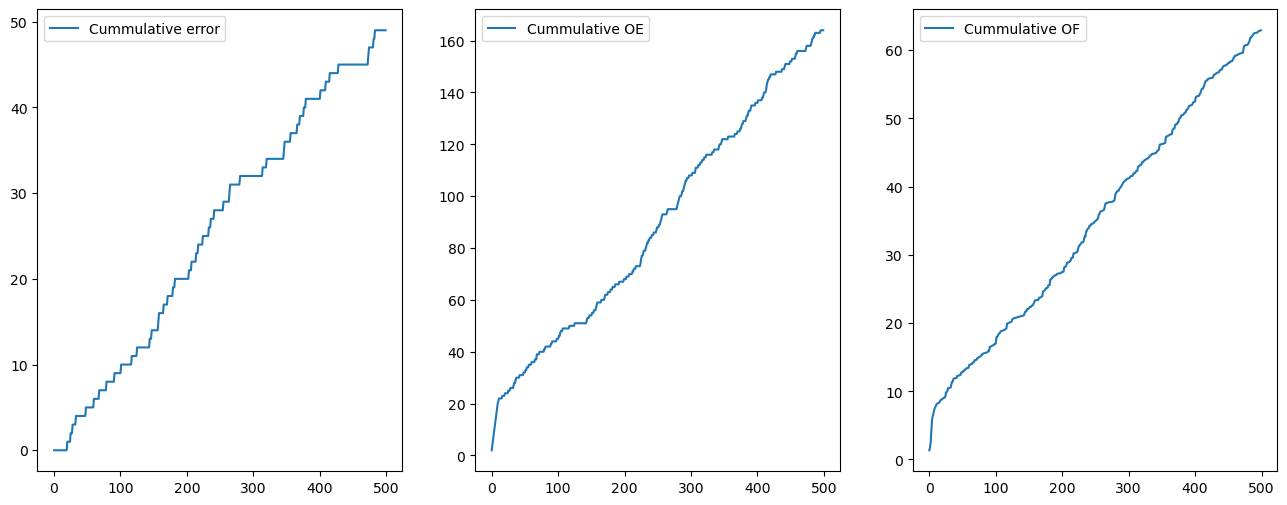

In [18]:
epsilon = 0.1
cp = ConformalNearestNeighboursClassifier(label_space=np.unique(Y), rnd_state=2024)

res = np.zeros(shape=(Y.shape[0], 5))

for i, (object, label) in tqdm(enumerate(zip(X, Y)), total=Y.shape[0], desc='Running online conformal prediction'):

    # Reality outputs object
    x = object

    # Forecaster outputs prediction set
    # Computing distances is needed both for prediction and learning. Returning the updated distance matrix saves some computation time
    Gamma, p_values, D = cp.predict(x, epsilon=epsilon, return_p_values=True, return_update=True) 

    # Reality outputs label
    y = label

    # Check error
    err = cp.err(Gamma, label)

    # Learn the label
    cp.learn_one(x, y, D)
    
    # Prefferred efficiency criteria

    # Observed excess
    cp.oe(Gamma, y)

    # Observed fuzziness
    cp.of(p_values, y)

    # For plotting
    res[i, 0] = cp.OE
    res[i, 1] = cp.OF
    res[i, 2] = cp.Err
    res[i, 3] = y
    res[i, 4] = err

print(f'Average error: {cp.Err/Y.shape[0]}')
print(f'Average observed excess: {cp.OE/Y.shape[0]}')
print(f'Average observed fuzziness: {cp.OF/Y.shape[0]}')

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(16,6))
axs[0].plot(res[:, 2], label='Cummulative error')
axs[0].legend()

axs[1].plot(res[:, 0], label='Cummulative OE')
axs[1].legend()

axs[2].plot(res[:, 1], label='Cummulative OF')
axs[2].legend()

Judging by the plot of the examples, the red ones (class 0) should be easier to predict, and indeed, the error rate for class 0 is significantly smaller.

In [19]:
for i in range(3):
    print(f'Error rate for label {i}: {res[np.where(res[:, 3]==i)[0]][:, 4].mean()}')

Error rate for label 0: 0.012048192771084338
Error rate for label 1: 0.1130952380952381
Error rate for label 2: 0.1686746987951807


# Questions
* Is there some fundamental reason to limit the number of neighbours considered to one? Could we not have the same sort of nonconformity measure with the mean or median of $k>1$ neighbours?
* The book proves the uniform distribution of the p-values in the setting of a general online compression model, which is nice, but I wonder if there is some simpler proof if we limit ourselves to the exchangeability model? I have not looked into it myself so far.